## Q1. Total number of fundings done in each year.

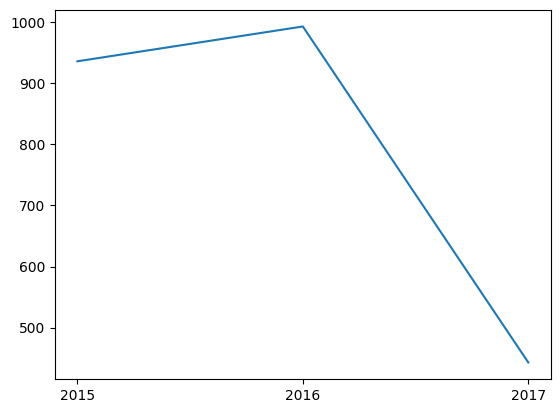

2015 936
2016 993
2017 443


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/startup_funding.csv")

df_yr = df['Date'].str[-4:]
count = df_yr.value_counts().sort_index()

plt.plot(count.index , count.values)
plt.show()

for i in range(len(count)):
  print((count.index[i]) , (count.values[i]))

## Q2. Top 10 Indian cities with most number of startups

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35


<ipython-input-2-6add164735b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[delhi] = "New Delhi"
<ipython-input-2-6add164735b2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[bgl] = "Bangalore"


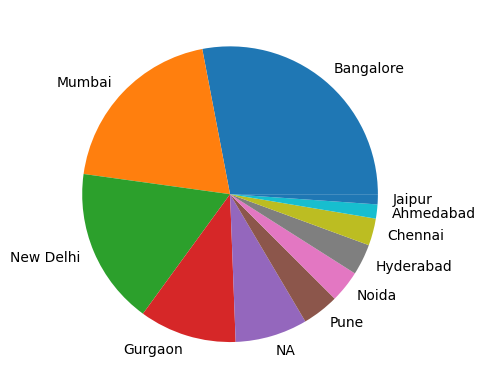

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/startup_funding.csv")

df = data.copy()
df_city = df['CityLocation']
df_city.fillna('NA', inplace= True)

delhi = df_city.str.contains('Delhi')
df_city[delhi] = "New Delhi"

bgl = df_city.str.contains('bangalore')
df_city[bgl] = "Bangalore"

df_city = (df_city.str.split('/',expand=True)[0]).str.strip()

val = df_city.value_counts()
for i in range(10):
  if val.index[i] == 'NA':
    continue
  print(val.index[i], val.values[i])

pie = val[:11]
plt.pie(pie.values, labels = pie.index)
plt.show()

## Q3. Top 10 Indian cities with most amount of fundings received.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_city = df['CityLocation']
df_city.fillna('NA', inplace= True)
delhi = df_city.str.contains('Delhi')
df_city[delhi] = "New Delhi"
bgl = df_city.str.contains('bangalore')
df_city[bgl] = "Bangalore"
df_city = (df_city.str.split('/',expand=True)[0]).str.strip()

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_fund = df['AmountInUSD']
df_fund.fillna(0, inplace= True)

df_n = pd.DataFrame(df_city)
df_n['amt'] = df_fund

val = df_n.groupby(0).sum()
arr = val.sort_values(by = 'amt' , ascending = False)[:11]
arr.drop('NA' , inplace=True)
s = arr.sum()

for i in range(10):
  if arr.index[i] == 'NA':
    continue
  pct = arr.values[i]*100/s
  print((arr.index[i]).strip() , "%.2f" %pct)

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


<ipython-input-3-d4d10663b6c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[delhi] = "New Delhi"
<ipython-input-3-d4d10663b6c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[bgl] = "Bangalore"


## Q4. Top 10 Indian cities with most amount of fundings received.

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


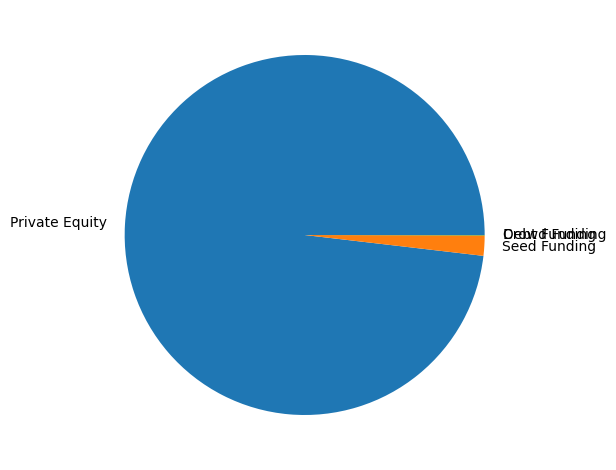

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_type = df['InvestmentType']
df_type.fillna('NA', inplace= True)

df_type[df_type == 'PrivateEquity'] = 'Private Equity'
df_type[df_type == 'Crowd funding'] = 'Crowd Funding'
df_type[df_type == 'SeedFunding'] = 'Seed Funding'

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_funds = df['AmountInUSD']
df_funds.fillna(0, inplace= True)

df_inttype = pd.DataFrame(df_type)
df_inttype['amt'] = df_funds

grpdval = df_inttype.groupby('InvestmentType').sum()

arrr = grpdval.sort_values(by = 'amt' , ascending = False)
s = arrr.sum()

investment_pie = []
investment_pie_index = []
for i in range(len(arrr)):
  if arrr.index[i] == 'NA':
    continue
  pct = arrr.values[i]*100/s
  print((arrr.index[i]).strip() , "%.2f" %pct)
  investment_pie.append("%.2f" %pct[0])
  investment_pie_index.append((arrr.index[i]).strip())

plt.pie(investment_pie, labels = investment_pie_index)
plt.tight_layout()
plt.show()


## Q5. Percentage of amount funded for each investment type.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_industry = df['IndustryVertical']
df_industry.fillna('NA', inplace= True)

df_industry = df_industry.replace('eCommerce' ,'Ecommerce')
df_industry = df_industry.replace('ecommerce' ,'Ecommerce')
df_industry = df_industry.replace('ECommerce' ,'Ecommerce')

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_funding = df['AmountInUSD']
df_funding.fillna(0, inplace= True)

df_indamt = pd.DataFrame(df_industry)
df_indamt['amt'] = df_funding

industryval = df_indamt.groupby('IndustryVertical').sum()
industryval = industryval.sort_values(by = 'amt' , ascending =False)

arrry = industryval.sort_values(by = 'amt' , ascending = False)[:6]
arrry.drop('NA' , inplace=True)
su = arrry.sum()

for i in range(len(arrry)):
  if arrry.index[i] == 'NA':
    continue
  pct = arrry.values[i]*100/su
  print((arrry.index[i]).strip() , "%.2f" %pct)


Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


## Q6.  Top 5 startups with most amount of total funding.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_stup = df['StartupName']

df_stup = df_stup.replace('Paytm Marketplace' ,'Paytm')
df_stup = df_stup.replace('OYO Rooms' ,'Oyo')
df_stup = df_stup.replace('Oyo Rooms' ,'Oyo')
df_stup = df_stup.replace('OyoRooms' ,'Oyo')
df_stup = df_stup.replace('Oyorooms' ,'Oyo')
df_stup = df_stup.replace('Flipkart.com' ,'Flipkart')
df_stup = df_stup.replace('Ola Cabs' ,'Ola')
df_stup = df_stup.replace('Olacabs' ,'Ola')

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_fundstp = df['AmountInUSD']
df_fundstp.fillna(0, inplace= True)

df_stpfund = pd.DataFrame(df_stup)
df_stpfund['amt'] = df_fundstp

startupval = df_stpfund.groupby('StartupName').sum()
startupval = startupval.sort_values(by = 'amt' , ascending =False)

arrray = startupval.sort_values(by = 'amt' , ascending = False)[:5]
suu = arrray.sum()

for i in range(len(arrray)):
  print((arrray.index[i]).strip())


Paytm
Flipkart
Ola
Snapdeal
Oyo


## Q7. Top 5 startups who received the most number of funding rounds.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_stup = df['StartupName']

df_stup = df_stup.replace('Paytm Marketplace' ,'Paytm')
df_stup = df_stup.replace('OYO Rooms' ,'Oyo')
df_stup = df_stup.replace('Oyo Rooms' ,'Oyo')
df_stup = df_stup.replace('OyoRooms' ,'Oyo')
df_stup = df_stup.replace('Oyorooms' ,'Oyo')
df_stup = df_stup.replace('Flipkart.com' ,'Flipkart')
df_stup = df_stup.replace('Ola Cabs' ,'Ola')
df_stup = df_stup.replace('Olacabs' ,'Ola')


a = df_stup.value_counts().sort_values(ascending = False)

for i in range(5):
  print((a.index[i]).strip(), a.values[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


## Q8. Investors who have invested maximum number of times.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("startup_funding.csv")
df = data.copy()

df_investor = df['InvestorsName']
df_investor.fillna('NA', inplace= True)
df_i = df_investor.str.split(',',expand=True)
li = []

for i in range(10):
  for j in df_i[i]:
    li.append(str(j).strip())


df_allinvst = pd.DataFrame(li, columns =['investor'])

x = df_allinvst.value_counts().sort_values(ascending = False)

print(x.index[1][0], x.values[1])


Sequoia Capital 64
